In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import scipy as sp
from scipy import stats

## Utility Functions

In [191]:
def Examine_Nulls(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    return missing_value_df

## Load and Process Data

In [209]:
precip_df = pd.read_csv('AHCCD_precip_processed.csv', index_col=['ClimID', 'Date'])
precip_df.drop('index', axis=1, inplace=True)
precip_df.reset_index(inplace=True)
precip_df.rename(columns={'ClimID' : 'Station'}, inplace=True)
precip_df['Date'] = pd.to_datetime(precip_df['Date'])
precip_df['Station'] = precip_df['Station'].astype(str) ## VERY IMPORTANT

C:\Users\quintoj\Anaconda3\envs\Default\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [210]:
temp_df = pd.read_csv('AHCCD_full.csv')

In [211]:
temp_df['Date'] = pd.to_datetime(temp_df['Date'])

In [212]:
np.unique(temp_df['Station']).shape

(323,)

In [213]:
np.unique(precip_df['Station']).shape

(323,)

In [214]:
merged_df_ = pd.merge(precip_df, temp_df, on=['Station', 'Date'])

In [215]:
np.unique(merged_df_['Station']).shape

(323,)

In [216]:
merged_df_

Station       Date  cR(mm)  cS(mm)  QCdP=cR+cS(mm)  snow_frac  \
0        1012010 1913-10-03   1.050     0.0           1.050        0.0   
1        1012010 1913-10-04  16.338     0.0          16.338        0.0   
2        1012010 1913-10-07  29.234     0.0          29.234        0.0   
3        1012010 1913-10-09   2.610     0.0           2.610        0.0   
4        1012010 1913-10-10  15.298     0.0          15.298        0.0   
...          ...        ...     ...     ...             ...        ...   
2450647  8502400 1984-08-22   4.417     0.0           4.417        0.0   
2450648  8502400 1984-08-24   0.337     0.0           0.337        0.0   
2450649  8502400 1984-08-25   0.439     0.0           0.439        0.0   
2450650  8502400 1984-08-26   0.300     0.0           0.300        0.0   
2450651  8502400 1984-08-27   0.300     0.0           0.300        0.0   

         Mean_Temp  Max_Temp  Min_Temp  
0             11.0      15.2       6.7  
1              8.4      12.2       4.5  
2              6.3       5.3       7.3  
3              5.8      10.1       1.4  
4              6.7      10.6       2.7  
...            ...       ...       ...  
2450647       12.8      16.3       9.3  
2450648        9.4      12.4       6.3  
2450649       11.7      18.0       5.4  
2450650       18.7      24.2      13.1  
2450651       17.4      21.6      13.1  

[2450652 rows x 9 columns]

In [196]:
# merged_df = merged_df[merged_df['Date'].dt.year >= 2000]

In [217]:
merged_df_.set_index(['Station', 'Date'], inplace=True)

In [218]:
Examine_Nulls(merged_df_)

column_name  percent_missing
cR(mm)                  cR(mm)              0.0
cS(mm)                  cS(mm)              0.0
QCdP=cR+cS(mm)  QCdP=cR+cS(mm)              0.0
snow_frac            snow_frac              0.0
Mean_Temp            Mean_Temp              0.0
Max_Temp              Max_Temp              0.0
Min_Temp              Min_Temp              0.0

In [219]:
merged_df_.describe()

cR(mm)        cS(mm)  QCdP=cR+cS(mm)     snow_frac     Mean_Temp  \
count  2.450652e+06  2.450652e+06    2.450652e+06  2.450652e+06  2.450652e+06   
mean   4.794209e+00  1.274905e+00    6.069114e+00  3.163323e-01  4.452037e+00   
std    8.765896e+00  3.726938e+00    8.982026e+00  4.565155e-01  1.121114e+01   
min    0.000000e+00  0.000000e+00    1.000000e-01  0.000000e+00 -5.280000e+01   
25%    0.000000e+00  0.000000e+00    7.450000e-01  0.000000e+00 -2.300000e+00   
50%    1.200500e+00  0.000000e+00    2.798000e+00  0.000000e+00  5.800000e+00   
75%    5.710000e+00  3.450000e-01    7.602000e+00  1.000000e+00  1.300000e+01   
max    3.255130e+02  9.594240e+02    9.681250e+02  1.000000e+00  3.670000e+01   

           Max_Temp      Min_Temp  
count  2.450652e+06  2.450652e+06  
mean   8.863532e+00  2.212113e-02  
std    1.158151e+01  1.137459e+01  
min   -5.150000e+01 -6.000000e+01  
25%    1.100000e+00 -5.900000e+00  
50%    9.400000e+00  1.800000e+00  
75%    1.770000e+01  8.300000e+00  
max    4.750000e+01  3.220000e+01

In [221]:
merged_df_.to_csv("combined_ahccd.csv")

In [222]:
merged_df = merged_df_[['Mean_Temp', 'snow_frac']]

In [223]:
merged_df

Mean_Temp  snow_frac
Station Date                            
1012010 1913-10-03       11.0        0.0
        1913-10-04        8.4        0.0
        1913-10-07        6.3        0.0
        1913-10-09        5.8        0.0
        1913-10-10        6.7        0.0
...                       ...        ...
8502400 1984-08-22       12.8        0.0
        1984-08-24        9.4        0.0
        1984-08-25       11.7        0.0
        1984-08-26       18.7        0.0
        1984-08-27       17.4        0.0

[2450652 rows x 2 columns]

## Univariate Modelling

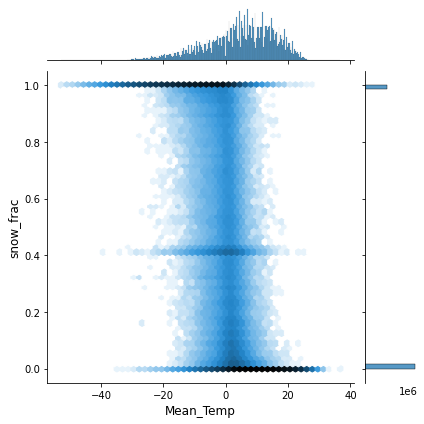

In [224]:
sns.jointplot(data=merged_df, x='Mean_Temp', y='snow_frac', kind='hex', bins='log')

<AxesSubplot:>

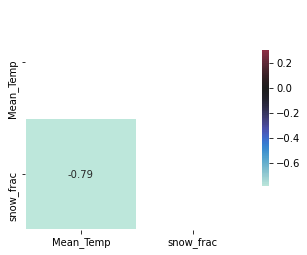

In [225]:
corr_matrix = merged_df.corr() 

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

## Linear Regression/Step Fcn

In [226]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='snow_frac ~ Mean_Temp', data=merged_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              snow_frac   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                 4.016e+06
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:03:25   Log-Likelihood:            -3.6683e+05
No. Observations:             2450652   AIC:                         7.337e+05
Df Residuals:                 2450650   BIC:                         7.337e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4592      0.000   2377.215      0.000       0.459       0.460
Mean_Temp     -0.0321    1.6e-05  -2003.891      0.000      -0.032      -0.032
==============================================================================
Omnibus:                    72684.490   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52643.530
Skew:                           0.259   Prob(JB):                         0.00
Kurtosis:                       2.504   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
pred = reg.fittedvalues.copy()
true = merged_df['snow_frac'].values.copy()
res = true - pred

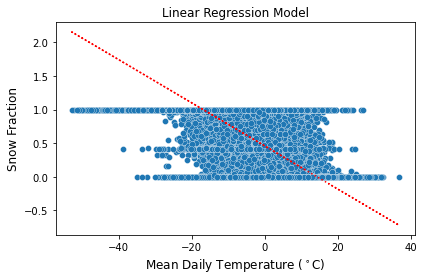

In [228]:
plt.plot(merged_df['Mean_Temp'], pred, c='r', linestyle=':')
plt.scatter(merged_df['Mean_Temp'], true, marker='o', edgecolor='white', linewidth=0.3) 
# plt.ylim([-0.05, 1.05])
plt.title('Linear Regression Model')
plt.xlabel("Mean Daily Temperature ($^\circ$C)")
plt.ylabel("Snow Fraction")
plt.tight_layout()

Text(0.5, 1.0, 'Fitted vs Residuals Plot')

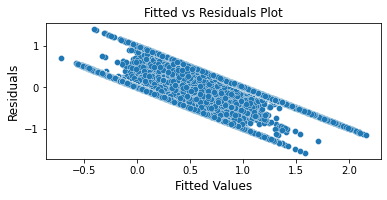

In [229]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(pred, res, marker='o', edgecolor='white', linewidth=0.3)
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title("Fitted vs Residuals Plot")

Coefficient of Determination: 0.9866196120107589


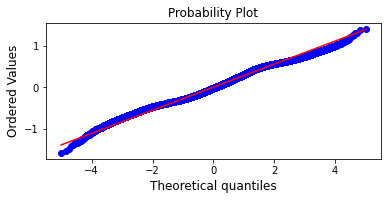

In [230]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(res, plot=ax, fit=True)
print("Coefficient of Determination:", r**2)

Text(0, 0.5, 'Residuals')

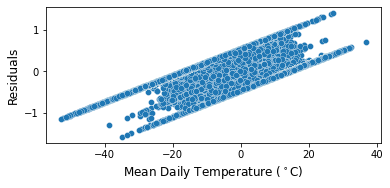

In [231]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(merged_df['Mean_Temp'], res, marker='o', edgecolor='white', linewidth=0.3)
plt.xlabel("Mean Daily Temperature ($^\circ$C)")
plt.ylabel('Residuals')

In [232]:
# Constrain regression line to horizontal lines at snow fractions of 0 and 1
x_lr = np.linspace(merged_df['Mean_Temp'].min(), merged_df['Mean_Temp'].max(), 1000)
m = reg.params.Mean_Temp
b = reg.params.Intercept
x0 = (1 - b)/m
x1 = -b/m

# Actual Predictions
y_lr = list(map((lambda x: 1 if x > 1 else (0 if x < 0 else x)), pred))
# For graphing
yy_lr = list(map((lambda x: 1 if x <= x0 else (m*x+b if x > x0 and x <= x1 else 0)), x_lr)) 

In [233]:
def RMSE(calculate_error, yData, resid=None, yPred=None, params=None):
    if calculate_error is False and resid is not None:
        SE = np.square(resid) # squared errors
        MSE = np.mean(SE) # mean squared errors
        RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
        Rsquared = 1.0 - (np.var(resid) / np.var(yData))
    elif calculate_error is True and yPred is not None:
        resid = yData - yPred
        SE = np.square(resid) # squared errors
        MSE = np.mean(SE) # mean squared errors
        RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
        Rsquared = 1.0 - (np.var(resid) / np.var(yData))
    if params is not None:
        print('Parameters:', params)
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

In [234]:
RMSE(calculate_error=True, yData=true, yPred=y_lr)

RMSE: 0.26723284211238757
R-squared: 0.6586866038754333


Text(0.5, 1.0, 'Linear Step Function')

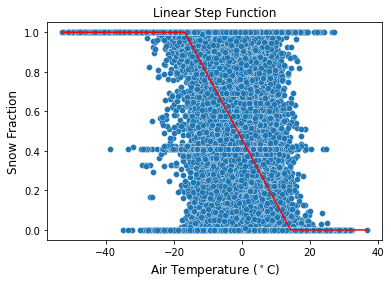

In [235]:
plt.scatter(merged_df['Mean_Temp'], true, marker='o', edgecolor='white', linewidth=0.3)
plt.plot(x_lr, yy_lr, c='r')
plt.xlabel('Air Temperature ($^\circ$C)')
plt.ylabel('Snow Fraction')
plt.title("Linear Step Function")

## Logistic Curve Fitting

In [236]:
from scipy.optimize import curve_fit 

In [237]:
def logistic4(x, k, mu):
    a = 1 
    c = 0
    return a + (c-a)/(1+np.exp(-k*(x-mu))) 

In [238]:
def myfit(func, x, y):
    xr = x.ravel()
    yr = y.ravel()
    asort = np.argsort(xr)
    popt, pcov = curve_fit(func, xr[asort], yr[asort])
    res = yr[asort]-func(xr[asort], *popt)
    return popt, res # gives error b/w every pred and true point -> useful for validation -> MSE

In [239]:
x = merged_df['Mean_Temp']
y = merged_df['snow_frac']

In [240]:
params_log, resid_log = myfit(logistic4, x, y)

In [241]:
RMSE(params=params_log, calculate_error=False, yData=y, resid=resid_log) 

Parameters: [0.5651863  0.28361584]
RMSE: 0.2139256855236989
R-squared: 0.7807026671693316


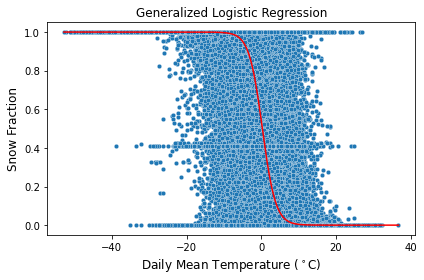

In [242]:
plt.scatter(x, y, marker='o', edgecolor='white', linewidth=0.3, label='Original Data', s=20)
plt.plot(x_lr, logistic4(x_lr, *params_log), color='red', label= 'Log Fit')
# plt.legend(loc='upper right')
plt.xlabel('Daily Mean Temperature ($^\circ$C)')
plt.ylabel('Snow Fraction')
plt.title("Generalized Logistic Regression")
plt.tight_layout()

## Isotonic Regression

In [243]:
from sklearn.isotonic import IsotonicRegression 

In [244]:
ir = IsotonicRegression(increasing=False).fit(x, y)
# Actual predictions
y_ir = ir.predict(x)
# For graphing
yy_ir = ir.predict(x_lr)

Text(0.5, 1.0, 'Isotonic Regression')

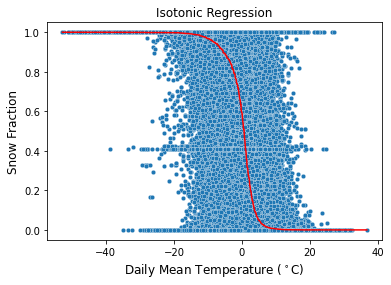

In [245]:
plt.scatter(x, y,  marker='o', edgecolor='white', linewidth=0.3, s=20)
plt.plot(x_lr, yy_ir, color='red')
plt.xlabel('Daily Mean Temperature ($^\circ$C)')
plt.ylabel('Snow Fraction')
plt.title('Isotonic Regression')

In [246]:
RMSE(calculate_error=True, yData=y, yPred=y_ir) 

RMSE: 0.21273858500850756
R-squared: 0.7828390778633566


## Heaviside Function

In [247]:
# Make a dataframe of mean temp values and predicted values from isotonoic regression
iso_pts = pd.DataFrame(
    {"Mean_Temp": merged_df['Mean_Temp'],
     "snow_frac": y_ir}
)
iso_pts.reset_index(inplace=True)
iso_pts.drop(['Date', 'Station'], axis=1, inplace=True)

In [248]:
# Function to determine the mean temperature at which isotonic regression gives a value of 0.5
def find_neighbours(value, df, var):
    exactmatch=df[df.snow_frac==value]
    if exactmatch.empty is False:
        return exactmatch.index
    else:
        lowerneighbour_ind = df[df.snow_frac<value].snow_frac.idxmax()
        upperneighbour_ind = df[df.snow_frac>value].snow_frac.idxmin()
        
        lower_diff = np.abs(df.iloc[lowerneighbour_ind, :].snow_frac - 0.5)
        upper_diff = np.abs(df.iloc[upperneighbour_ind, :].snow_frac - 0.5)

        if lower_diff > upper_diff:
            return df.iloc[upperneighbour_ind, :][var]
        else:
            return df.iloc[lowerneighbour_ind, :][var]

In [249]:
thresh = find_neighbours(0.5, iso_pts, 'Mean_Temp')
print("Daily Mean Temp Threshold:", thresh) 

Daily Mean Temp Threshold: 0.6


In [250]:
def Heaviside(x, a ,b, c): 
    return a * (np.sign(x - b) + c) # Heaviside function

In [251]:
y_heaviside = Heaviside(x, -0.5, thresh, -1)
RMSE(calculate_error=True, yData=y, yPred=y_heaviside) 

RMSE: 0.2508959033480313
R-squared: 0.698133482315993


Text(0.5, 1.0, 'Heaviside Function')

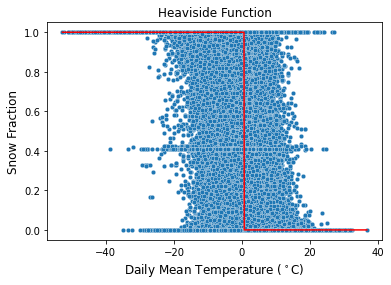

In [252]:
plt.scatter(x, y,  marker='o', edgecolor='white', linewidth=0.3, s=20)
plt.plot(x_lr, Heaviside(x_lr, -0.5, thresh, -1), c='r')
plt.xlabel('Daily Mean Temperature ($^\circ$C)')
plt.ylabel('Snow Fraction')
plt.title('Heaviside Function')

In [253]:
def Binned_Stats(df, variable, lower_temp, upper_temp, test_stat='mean', 
                 plot_histogram=False, interval=0.1, plot_bins=False):  
    # Define temperature bins
    values = np.arange(lower_temp, upper_temp, interval)
    values = [round(i, 1) for i in values]
    
    # Calculate bin statistics
    bin_stats, bin_edges, binnumber = stats.binned_statistic(
        df[variable], 
        df['snow_frac'], 
        statistic='mean', 
        bins=values
    )
    if plot_bins is True:
        plt.figure()
        plt.plot(df[variable], df['snow_frac'], 'c.', label='raw data', alpha=0.005)
        plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='red', lw=5,
                   label='binned statistic of data')
        plt.legend(loc='lower left')
        plt.xlabel(variable)
        plt.ylabel('Snow Fraction')
    
    # Separate snow fraction into temperature-based bins
    bins = [df['snow_frac'][binnumber==i] for i in range(len(values))]
    
    # Concatenate all bins into a single dataframe, with the temperature bin as a multi-index
    bin_df = pd.concat(bins, keys=values, names=[variable])
    return bin_edges, pd.DataFrame(bin_df)

In [254]:
def Binned_Quantiles(df, variable, quantiles, bins):
    quantiles = [df.iloc[df.index.get_level_values(variable) == i].quantile(qts, axis=0) for i in bins]
    quantile_df = pd.concat(quantiles, keys=bins, names=[variable])
    return pd.DataFrame(quantile_df)

In [255]:
bin_edges, bin_df = Binned_Stats(merged_df,'Mean_Temp', -20, 20)
qts = [0.25, 0.5, 0.75]
quantile_df = Binned_Quantiles(bin_df, 'Mean_Temp', qts, bin_edges)

In [256]:
qdf = quantile_df.reset_index()
qdf.rename(columns={'level_1': 'quantile'}, inplace=True)
qdf['snow_frac'] = qdf['snow_frac'].map(lambda x: x*100)

<AxesSubplot:xlabel='Mean_Temp', ylabel='snow_frac'>

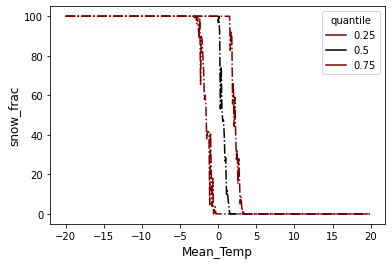

In [257]:
sns.lineplot(data=qdf, x="Mean_Temp", y="snow_frac", hue='quantile', palette=['maroon','black','maroon'], linestyle='dashdot') 

C:\Users\quintoj\Anaconda3\envs\Default\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


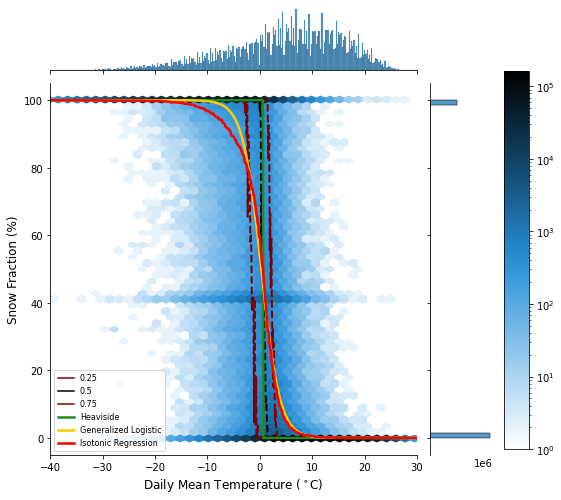

In [260]:
plt.rcParams["axes.labelsize"] = 12
g = sns.jointplot(
    x=merged_df['Mean_Temp'], 
    y=merged_df['snow_frac']*100, 
    kind='hex', 
    bins='log', 
    height=7
)
sns.lineplot(
    data=qdf, 
    x="Mean_Temp", 
    y="snow_frac", 
    hue='quantile', 
    palette=['maroon','black','maroon'], 
    linestyle='--', 
    ax=g.ax_joint, 
    linewidth=2
)
sns.lineplot(
    x_lr, 
    Heaviside(x_lr, -50, thresh, -1), 
    color='forestgreen', 
    linewidth=2.5, 
    label='Heaviside', 
    ax=g.ax_joint
)
sns.lineplot(
    x=x_lr, 
    y=(logistic4(x_lr, *params_log))*100, 
    color='#ffcc00', 
    label= 'Generalized Logistic', 
    ax=g.ax_joint, 
    linewidth=2.5
)
sns.lineplot(
    x=x_lr, 
    y=[i*100 for i in yy_ir], 
    color='red', 
    label= 'Isotonic Regression', 
    ax=g.ax_joint, 
    linewidth=2.5
)
# sns.lineplot(
#     x=x_lr, 
#     y=[i*100 for i in yy_lr], 
#     color='m', 
#     label= 'Linear Regression', 
#     ax=g.ax_joint, 
#     linewidth=2.5, 
#     linestyle=':'
# )

g.ax_joint.legend(prop={"size": 8}, loc='lower left')
g.ax_joint.set(xlabel='Daily Mean Temperature ($^\circ$C)', ylabel='Snow Fraction (%)', xlim=(-40, 30))
cbar_ax = g.fig.add_axes([1, .1, .05, .75])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.savefig('Mean_Temp_final.png')